In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime as dt

In [2]:
def datetime_transform(data):
    mm_dd_yyyy = data["Date"].split("/")
    data["Date"] = mm_dd_yyyy[2] + '-' + mm_dd_yyyy[0] + '-' + mm_dd_yyyy[1]
    return data

In [12]:
df_sp500 = pd.read_csv("sp500_4year.csv")
df_sp500 = df_sp500.apply(datetime_transform, axis=1)
df_sp500 = df_sp500.sort_values(by="Date")
df_sp500.loc[:, 'Date'] = pd.to_datetime(df_sp500['Date'].values.tolist()).date
df_sp500 = df_sp500.set_index('Date')
df_sp500.head()
# df_sp500.index = df_sp500.set_index('Date')

,Open,High,Low,Close
Date,,,,
2018-06-07,2774.84,2779.90,2760.16,2770.37
2018-06-08,2765.84,2779.39,2763.59,2779.03
2018-06-11,2780.18,2790.21,2780.17,2782.00
2018-06-12,2785.60,2789.80,2778.78,2786.85
2018-06-13,2787.94,2791.47,2774.65,2775.63


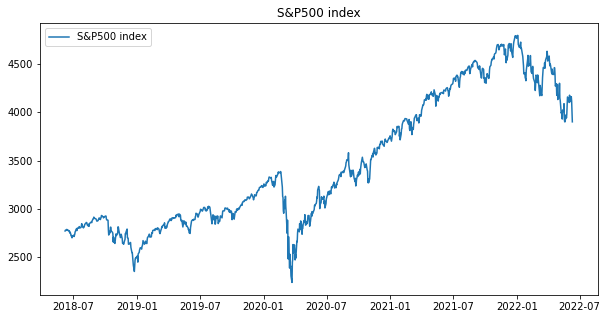

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(df_sp500.loc[:, "Close"], label = 'S&P500 index')
plt.title('S&P500 index')
plt.legend()

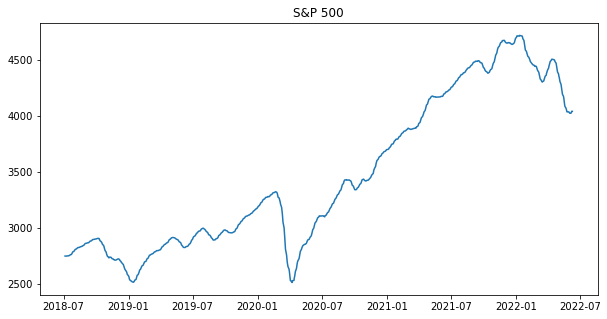

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))
df_sp500.loc[:, "MA20"] = df_sp500.loc[:, "Close"].rolling(20).mean()
plt.title("S&P 500")
plt.plot(df_sp500.loc[:, "MA20"], label = 'S&P500 MA20')
plt.show()

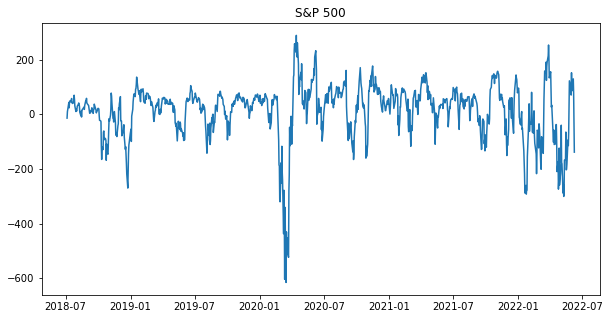

In [41]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title("S&P 500")
plt.plot(df_sp500.loc[:, "Close"] - df_sp500.loc[:, "MA20"], label = 'S&P500 MA20')
plt.show()

In [20]:
np.roll(df_sp500.loc[:, "Close"], 1)

array([3900.86, 2770.37, 2779.03, ..., 4160.68, 4115.77, 4017.82])

In [18]:
df_sp500.loc[:, "Close"], 1

(Date
 2018-06-07    2770.37
 2018-06-08    2779.03
 2018-06-11    2782.00
 2018-06-12    2786.85
 2018-06-13    2775.63
                ...   
 2022-06-06    4121.43
 2022-06-07    4160.68
 2022-06-08    4115.77
 2022-06-09    4017.82
 2022-06-10    3900.86
 Name: Close, Length: 1011, dtype: float64,
 1)

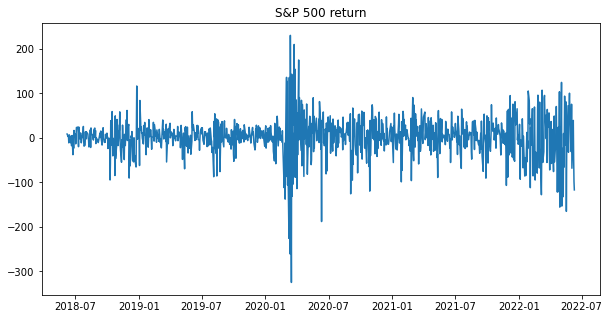

In [23]:

# df_sp500_close_shift = np.roll(df_sp500_close, 1) - df_sp500_close
# plt.title("S&P 500 return")
# plt.plot(df_sp500_close_shift[1:])
# plt.show()
fig, ax = plt.subplots(figsize = (10, 5))
roll_value = np.roll(df_sp500.loc[:, "Close"], 1)
roll_value[0] = None
df_sp500["return"] = df_sp500.loc[:, "Close"] - roll_value
plt.title("S&P 500 return")
plt.plot(df_sp500.loc[:, "return"], label = 'S&P500 return')
plt.show()

In [24]:
from pyhht.visualization import plot_imfs
import pyhht

2
3
4
5
6
7
8


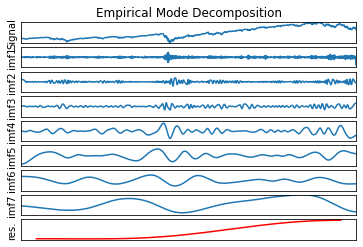

In [25]:
decomposer = pyhht.emd.EMD(df_sp500.loc[:, "Close"])
imfs = decomposer.decompose()
plot_imfs(df_sp500.loc[:, "Close"], imfs, np.arange(len(df_sp500)))

2


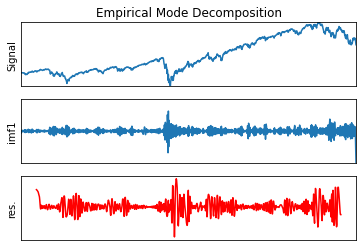

In [26]:
plot_imfs(df_sp500.loc[:, "Close"], imfs[:2, :], np.arange(len(df_sp500)))

In [38]:
selected_imf = np.expand_dims(imfs[1, :], axis=0)

2


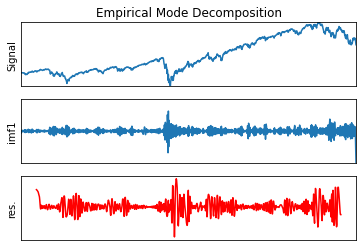

In [40]:
plot_imfs(df_sp500.loc[:, "Close"], imfs[:2, :], np.arange(len(df_sp500)))

In [48]:
# import yfinance as yf
# data = yf.download("2603.TW", start="2019-08-01", end="2022-05-01")
# data.to_csv("2603_index.csv")

[*********************100%***********************]  1 of 1 completed


In [66]:
df_2603 = pd.read_csv("2603_index.csv")
df_2603.loc[:, 'Date'] = pd.to_datetime(df_2603['Date'].values.tolist()).date
df_2603 = df_2603.set_index('Date')

In [51]:
df_2609 = pd.read_csv("2609_index.csv")
df_2609.loc[:, 'Date'] = pd.to_datetime(df_2609['Date'].values.tolist()).date
df_2609 = df_2609.set_index('Date')

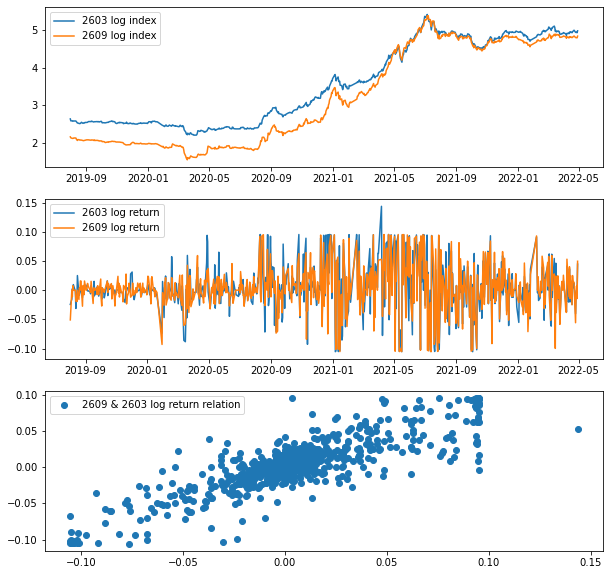

In [86]:
fig, ax = plt.subplots(3,1,figsize = (10, 10))
ax[0].plot(np.log(df_2603['Close']), label = '2603 log index')
ax[0].plot(np.log(df_2609['Close']), label = '2609 log index')
ax[0].legend()
ax[1].plot(np.log(df_2609['Close']).diff(), label = '2603 log return')
ax[1].plot(np.log(df_2603['Close']).diff(), label = '2609 log return')
ax[1].legend()
ax[2].scatter(np.log(df_2609['Close']).diff(), np.log(df_2603['Close']).diff(), label = '2609 & 2603 log return relation')
ax[2].legend()

In [67]:
df_2330 = pd.read_csv("2330_index.csv")
df_2330.loc[:, 'Date'] = pd.to_datetime(df_2330['Date'].values.tolist()).date
df_2330 = df_2330.set_index('Date')

In [81]:
df_2881 = pd.read_csv("2881_index.csv")
df_2881.loc[:, 'Date'] = pd.to_datetime(df_2881['Date'].values.tolist()).date
df_2881 = df_2881.set_index('Date')

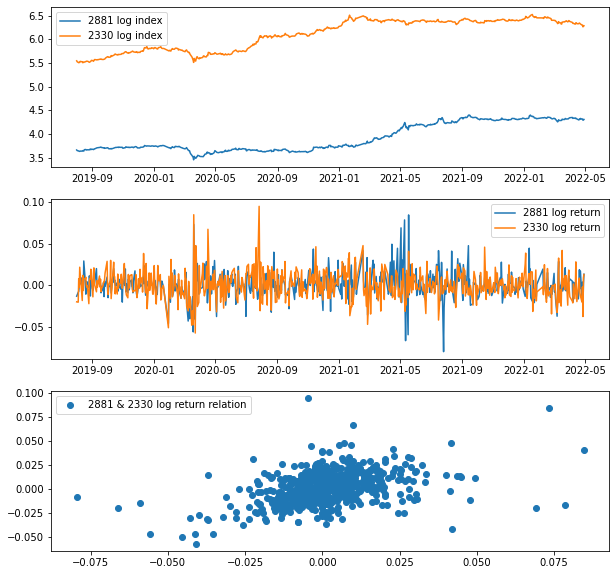

In [87]:
fig, ax = plt.subplots(3,1,figsize = (10, 10))
ax[0].plot(np.log(df_2881['Close']), label = '2881 log index')
ax[0].plot(np.log(df_2330['Close']), label = '2330 log index')
ax[0].legend()
ax[1].plot(np.log(df_2881['Close']).diff(), label = '2881 log return')
ax[1].plot(np.log(df_2330['Close']).diff(), label = '2330 log return')
ax[1].legend()
ax[2].scatter(np.log(df_2881['Close']).diff(), np.log(df_2330['Close']).diff(), label = '2881 & 2330 log return relation')
ax[2].legend()